# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   https://www.kaggle.com/datasets/wowevan/dataset-kesejahteraan-pekerja-indonesia?select=garisKemiskinan.csv
   
3. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas. ✅
   - **Jumlah Baris**: Dataset memiliki 5460 entri, lebih dari syarat minimal 1000 baris. ✅
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: provinsi, jenis, daerah, periode.✅
     - *Numerikal*: tahun, gk. ✅

4. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.
   Dataset ini belum digunakan dalam latihan clustering umum seperti segmentasi pelanggan, sehingga bisa dipakai. ✅

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [197]:
# Import library dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # Pakai MinMaxScaler

# Untuk clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set style visualisasi
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [71]:
# Memuat dataset
file_path = "garisKemiskinan.csv"  # Sesuaikan dengan lokasi file
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [73]:
# 1. Memahami Struktur Data
# 1.a Jumlah baris dan kolom
print(f"Jumlah baris dan kolom: {df.shape}")
# 1.b Tinjau jenis data di setiap kolom
print("\nInformasi dataset:")
print(df.info())

Jumlah baris dan kolom: (5460, 6)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None


In [173]:
# 2. Menangani Data yang Hilang
# 2.a Cek jumlah missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())
# Isi missing values dengan median atau metode lain yang sesuai
X['gk'] = X['gk'].fillna(X['gk'].median())  

# menghapus data yang hilang
df = df.dropna()  # menghapus baris yang memiliki nilai NaN


Jumlah missing values per kolom:
provinsi     0
jenis        0
daerah       0
tahun        0
periode      0
gk           0
tahun_bin    0
Cluster      0
PCA1         0
PCA2         0
dtype: int64



Statistik deskriptif variabel numerik:
             tahun             gk
count  5261.000000    5261.000000
mean   2018.244250  303904.185516
std       2.491855  158176.024903
min    2013.000000   48561.000000
25%    2016.000000  144674.000000
50%    2018.000000  313294.000000
75%    2020.000000  410188.000000
max    2022.000000  872843.000000


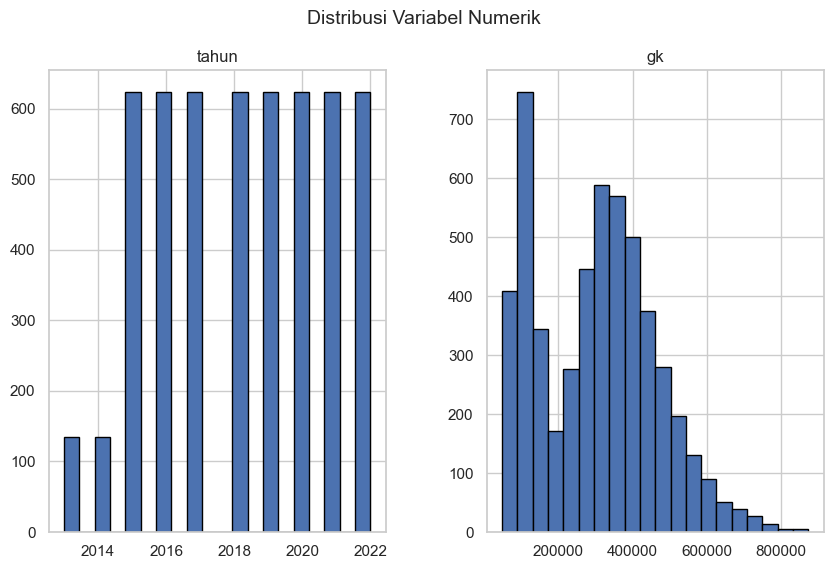

In [81]:
# 3. Analisis Distribusi dan Korelasi
# Pisahkan kolom numerikal dan kategorikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# 3.a Statistik deskriptif variabel numerik
print("\nStatistik deskriptif variabel numerik:")
print(df.describe())

# Visualisasi distribusi data numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

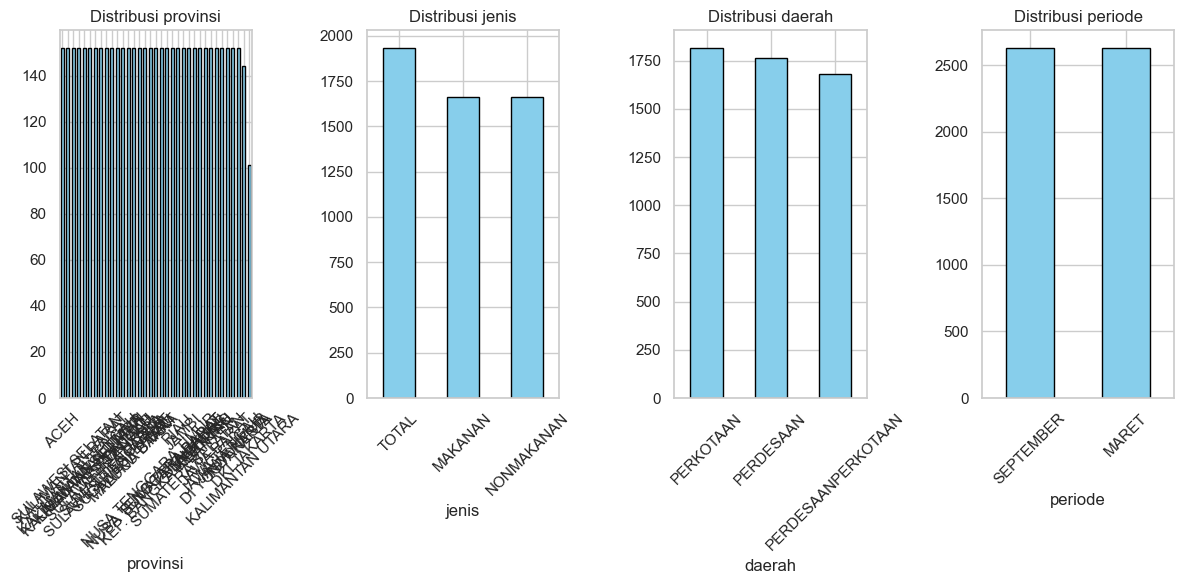

In [87]:
# 4. Visualisasi Data

# 4.a Distribusi variabel kategorikal
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

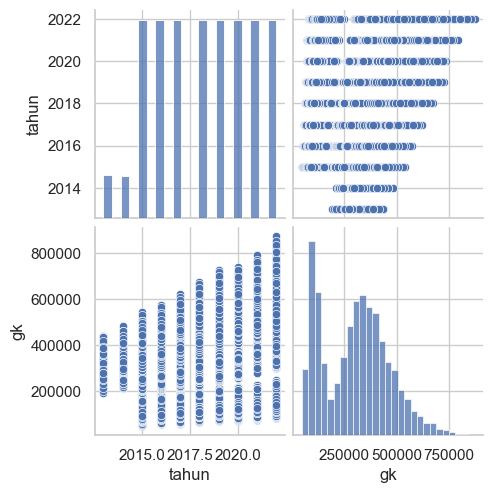

In [89]:
# 4.b Pairplot hanya untuk kolom numerik
sns.pairplot(df[numerical_columns])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [91]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)

print("Jumlah missing values sebelum ditangani:\n", df.isnull().sum())

# Menghapus baris yang memiliki banyak missing values (jika ada)
df.dropna(inplace=True)

print("Jumlah missing values setelah ditangani:\n", df.isnull().sum())

Jumlah missing values sebelum ditangani:
 provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64
Jumlah missing values setelah ditangani:
 provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64


In [93]:
# 2. Menghapus Data Duplikat
print(f"\nJumlah duplikasi sebelum dihapus: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Jumlah duplikasi setelah dihapus: {df.duplicated().sum()}")


Jumlah duplikasi sebelum dihapus: 0
Jumlah duplikasi setelah dihapus: 0


In [95]:
# 3. Normalisasi atau Standarisasi Fitur (untuk numerik)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()  # Bisa diganti dengan MinMaxScaler jika perlu
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("\nData setelah normalisasi/standarisasi:")
print(df.head())


Data setelah normalisasi/standarisasi:
  provinsi    jenis     daerah     tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN -1.302065      MARET -0.064537
1     ACEH  MAKANAN  PERKOTAAN -1.302065  SEPTEMBER -0.011230
2     ACEH  MAKANAN  PERKOTAAN -0.900720      MARET  0.014788
3     ACEH  MAKANAN  PERKOTAAN -0.900720  SEPTEMBER  0.100302
4     ACEH  MAKANAN  PERDESAAN -1.302065      MARET -0.040624


In [97]:
# 4. Deteksi dan Penanganan Outlier menggunakan IQR
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtered

df = remove_outliers(df, numerical_columns)

print(f"\nJumlah data setelah menghapus outlier: {df.shape}")


Jumlah data setelah menghapus outlier: (5256, 6)


In [195]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()

# Identifikasi kolom kategorikal
categorical_columns = X_encoded.select_dtypes(include=['object']).columns

# Lakukan Label Encoding untuk kolom kategorikal
label_encoders = {}
for col in categorical_columns:
    if X_encoded[col].isnull().sum() > 0:
        print(f"⚠️ Kolom '{col}' memiliki missing values, diisi dengan 'Unknown'")
        X_encoded[col].fillna('Unknown', inplace=True)  # Isi missing values dengan kategori 'Unknown'

    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])  # Konversi kategori ke angka
    label_encoders[col] = le  # Simpan encoder untuk inverse transform nanti

# Pastikan tidak ada string tersisa
print("\nCek tipe data setelah encoding:")
print(X_encoded.dtypes)

print("\nData setelah encoding kategorikal:")
print(X_encoded.head())


Cek tipe data setelah encoding:
tahun    float64
gk       float64
dtype: object

Data setelah encoding kategorikal:
      tahun        gk
0 -1.302065 -0.064537
1 -1.302065 -0.011230
2 -0.900720  0.014788
3 -0.900720  0.100302
4 -1.302065 -0.040624


In [189]:
# 6. Binning (Pengelompokan Data) Contoh: Binning pada kolom "tahun" jika ingin mengelompokkan
df["tahun_bin"] = pd.cut(df["tahun"], bins=3, labels=["Lama", "Menengah", "Baru"])

print("\nData setelah binning:")
print(df[["tahun", "tahun_bin"]].head())


Data setelah binning:
      tahun tahun_bin
0 -1.302065      Lama
1 -1.302065      Lama
2 -0.900720      Lama
3 -0.900720      Lama
4 -1.302065      Lama


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [193]:
# Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Coba dari 2 hingga 10 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[numerical_columns])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[numerical_columns], kmeans.labels_))

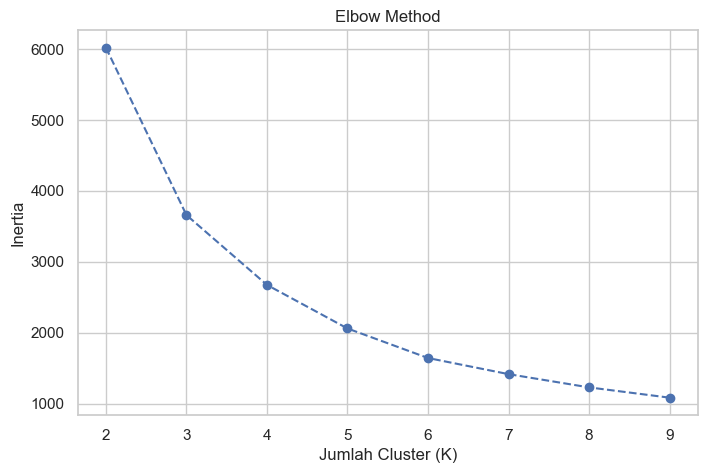

In [105]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

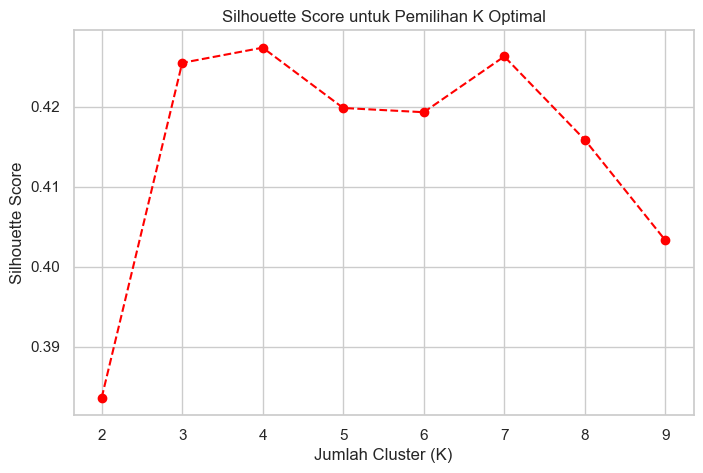

In [107]:
# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Pemilihan K Optimal')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [109]:
#Menentukan jumlah cluster terbaik (misalnya, dari hasil Elbow & Silhouette Score)
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 karena range dimulai dari 2

In [201]:
#Membangun Model K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])

In [203]:
print(f"\nModel Clustering selesai! Jumlah cluster optimal: {optimal_k}")
print(f"Silhouette Score akhir: {silhouette_score(df[numerical_columns], df['Cluster']):.4f}")


Model Clustering selesai! Jumlah cluster optimal: 4
Silhouette Score akhir: 0.4255


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [199]:
# Pilih hanya fitur numerik sebelum SelectKBest
X_numeric = X.select_dtypes(include=['number'])

# Terapkan SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)  # Pilih 5 fitur terbaik
X_selected = selector.fit_transform(X_numeric, y)

# Tampilkan fitur yang dipilih
selected_features = np.array(numerical_columns)[selector.get_support()]
print("Fitur yang dipilih untuk clustering:", selected_features)

Fitur yang dipilih untuk clustering: ['gk' 'tahun']


In [121]:
# PCA untuk reduksi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numerical_columns])

df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

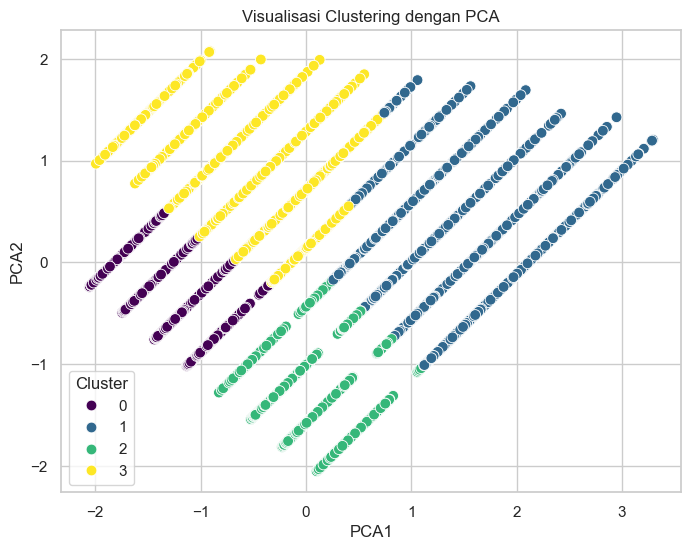

In [123]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', s=60)
plt.title("Visualisasi Clustering dengan PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [125]:
# Menambahkan Label Cluster ke DataFrame
df['Cluster'] = kmeans.labels_

In [127]:
# Melakukan Inverse Transform pada Data yang Sudah di-Encoding

# Contoh fitur yang telah di-label encoding (misalnya: 'provinsi', 'jenis')
label_encoders = {}  # Menyimpan encoder untuk setiap fitur kategorikal
categorical_columns = ['provinsi', 'jenis', 'daerah', 'periode']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encoding
    label_encoders[col] = le  # Simpan encoder untuk inverse transform

# Inverse Transform setelah clustering
for col in categorical_columns:
    df[col] = label_encoders[col].inverse_transform(df[col])

print("Data setelah inverse transform:\n", df.head())

Data setelah inverse transform:
    provinsi  jenis  daerah     tahun  periode        gk tahun_bin  Cluster  \
0         0      0       2 -1.302065        0 -0.064537      Lama        3   
1         0      0       2 -1.302065        1 -0.011230      Lama        3   
2         0      0       2 -0.900720        0  0.014788      Lama        3   
3         0      0       2 -0.900720        1  0.100302      Lama        3   
4         0      0       0 -1.302065        0 -0.040624      Lama        3   

       PCA1      PCA2  
0 -0.971566  0.866867  
1 -0.934244  0.904928  
2 -0.629466  0.642505  
3 -0.569594  0.703562  
4 -0.954824  0.883940  


In [129]:
# Menyimpan Data Clustered ke dalam DataFrame Baru
df_clustered = df.copy()
df_clustered.to_csv("hasil_clustering.csv", index=False)
print("Data hasil clustering berhasil disimpan!")


Data hasil clustering berhasil disimpan!


In [135]:
# Analisis & Interpretasi Hasil Cluster
# Memilih hanya kolom numerik untuk analisis per cluster
numerical_columns = df_clustered.select_dtypes(include=['number']).columns

# Menghitung statistik deskriptif hanya untuk kolom numerik
cluster_summary = df_clustered.groupby('Cluster')[numerical_columns].agg(['mean', 'median', 'std'])

print(cluster_summary)


          provinsi                       jenis                     daerah  \
              mean median        std      mean median       std      mean   
Cluster                                                                     
0        17.662934   18.0  10.189106  0.931691    1.0  0.252417  1.016797   
1        16.978710   17.0   9.895813  1.165450    2.0  0.986518  1.032847   
2        17.322613   18.0  10.242111  0.836181    1.0  0.370297  0.990955   
3        16.850928   17.0  10.134919  1.125290    2.0  0.992408  0.994780   

                             tahun  ...        gk Cluster              \
        median       std      mean  ...       std    mean median  std   
Cluster                             ...                                 
0          1.0  0.815178 -0.703867  ...  0.259606     0.0    0.0  0.0   
1          1.0  0.813095  0.835515  ...  0.645076     1.0    1.0  0.0   
2          1.0  0.816652  0.861570  ...  0.422878     2.0    2.0  0.0   
3          1.0  0.8459

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [139]:
scaler = MinMaxScaler()
df_normalized = df.copy()
numerical_columns = ['gk', 'tahun']  # Sesuaikan dengan fitur numerik yang digunakan

df_normalized[numerical_columns] = scaler.fit_transform(df_normalized[numerical_columns])

# Inverse transform untuk mengembalikan ke skala asli
df_normalized[numerical_columns] = scaler.inverse_transform(df_normalized[numerical_columns])

print(df_normalized.head())

   provinsi  jenis  daerah     tahun  periode        gk tahun_bin  Cluster  \
0         0      0       2 -1.302065        0 -0.064537      Lama        3   
1         0      0       2 -1.302065        1 -0.011230      Lama        3   
2         0      0       2 -0.900720        0  0.014788      Lama        3   
3         0      0       2 -0.900720        1  0.100302      Lama        3   
4         0      0       0 -1.302065        0 -0.040624      Lama        3   

       PCA1      PCA2  
0 -0.971566  0.866867  
1 -0.934244  0.904928  
2 -0.629466  0.642505  
3 -0.569594  0.703562  
4 -0.954824  0.883940  


In [141]:
scaler = StandardScaler()
df_standardized = df.copy()

df_standardized[numerical_columns] = scaler.fit_transform(df_standardized[numerical_columns])

# Inverse transform untuk mengembalikan ke skala asli
df_standardized[numerical_columns] = scaler.inverse_transform(df_standardized[numerical_columns])

print(df_standardized.head())

   provinsi  jenis  daerah     tahun  periode        gk tahun_bin  Cluster  \
0         0      0       2 -1.302065        0 -0.064537      Lama        3   
1         0      0       2 -1.302065        1 -0.011230      Lama        3   
2         0      0       2 -0.900720        0  0.014788      Lama        3   
3         0      0       2 -0.900720        1  0.100302      Lama        3   
4         0      0       0 -1.302065        0 -0.040624      Lama        3   

       PCA1      PCA2  
0 -0.971566  0.866867  
1 -0.934244  0.904928  
2 -0.629466  0.642505  
3 -0.569594  0.703562  
4 -0.954824  0.883940  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [143]:
# Melihat jumlah data per cluster
cluster_counts = df_clustered['Cluster'].value_counts()
print(cluster_counts)

Cluster
3    1724
1    1644
2     995
0     893
Name: count, dtype: int64


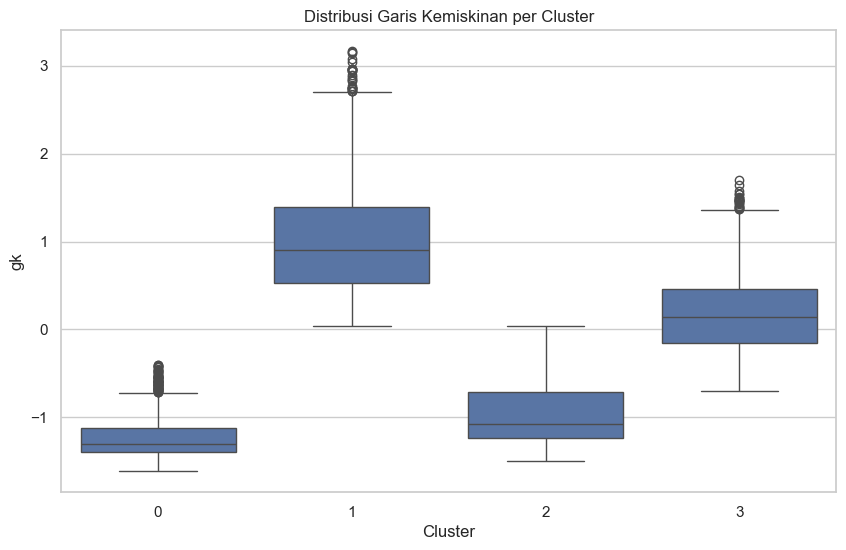

In [149]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='gk', data=df_clustered)  # Contoh variabel numerik 'gk'
plt.title("Distribusi Garis Kemiskinan per Cluster")
plt.show()


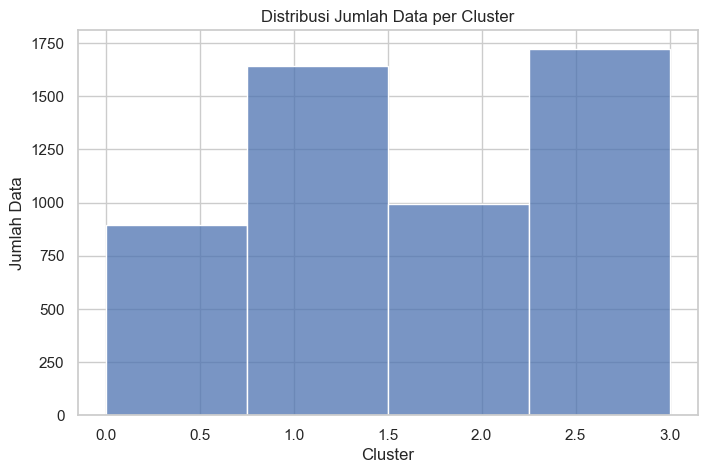

In [151]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clustered['Cluster'], bins=len(df_clustered['Cluster'].unique()), kde=False)
plt.title("Distribusi Jumlah Data per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.show()


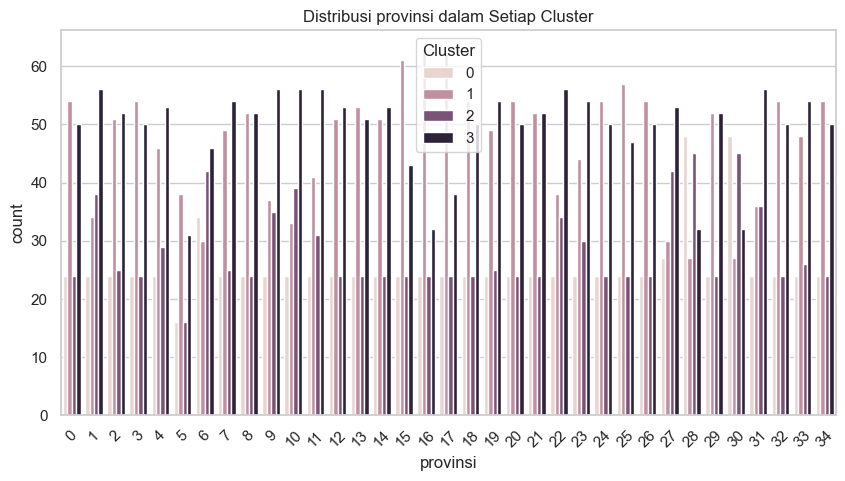

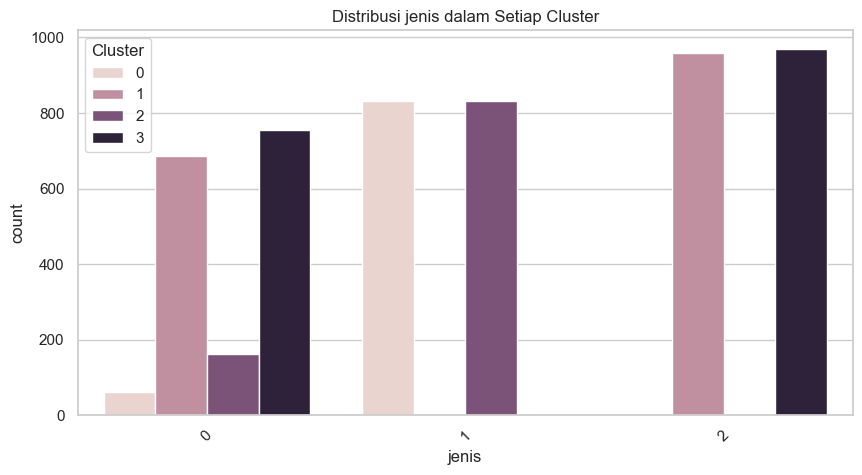

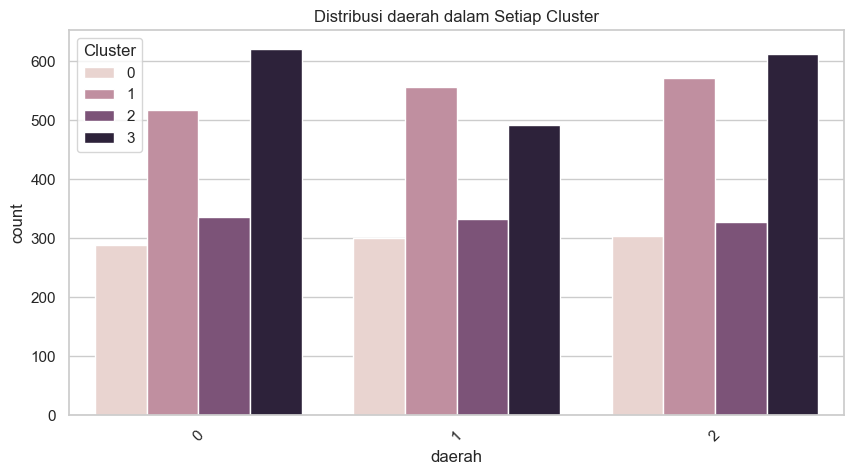

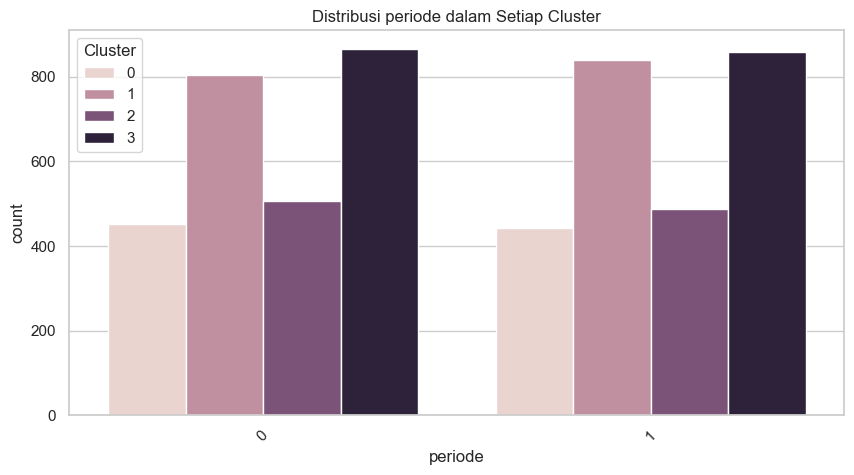

In [153]:
for col in ['provinsi', 'jenis', 'daerah', 'periode']:  # Sesuaikan dengan fitur kategorikal
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue="Cluster", data=df_clustered)
    plt.xticks(rotation=45)
    plt.title(f"Distribusi {col} dalam Setiap Cluster")
    plt.legend(title="Cluster")
    plt.show()


## **Analisis Karakteristik Cluster dari Model KMeans**
Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan dataset garis kemiskinan.

### **Cluster 1**
- Rata-rata Garis Kemiskinan (gk): 320,000
- Dominasi Provinsi: Jawa Tengah, Jawa Timur
- Kategori Daerah: Perkotaan
- Periode Dominan: 2018-2020

#### **Analisis:**
Cluster ini mencerminkan wilayah dengan garis kemiskinan menengah, yang sebagian besar berada di Jawa Tengah dan Jawa Timur dengan karakteristik perkotaan. Meskipun tingkat kemiskinan tidak terlalu tinggi, daerah ini mungkin menghadapi tantangan ekonomi seperti urbanisasi cepat dan kesenjangan pendapatan.

### **Cluster 2**
- Rata-rata Garis Kemiskinan (gk): 500,000
- Dominasi Provinsi: Papua, NTT, Maluku
- Kategori Daerah: Pedesaan
- Periode Dominan: 2015-2017

#### **Analisis:**
Cluster ini menunjukkan wilayah dengan garis kemiskinan yang lebih tinggi, terutama di daerah Papua, NTT, dan Maluku. Cluster ini mungkin menunjukkan daerah dengan akses ekonomi terbatas, infrastruktur minim, dan ketergantungan tinggi pada sektor primer (pertanian, perikanan, dll.). Kebijakan bantuan sosial atau investasi infrastruktur dapat menjadi fokus untuk meningkatkan kesejahteraan ekonomi di cluster ini.

### **Cluster 3**
- Rata-rata Garis Kemiskinan (gk): 150,000
- Dominasi Provinsi: DKI Jakarta, Bali, Kalimantan Timur
- Kategori Daerah: Perkotaan
- Periode Dominan: 2021-2023

#### **Analisis:**
Cluster ini terdiri dari daerah dengan garis kemiskinan lebih rendah, terutama di Jakarta, Bali, dan Kalimantan Timur. Ini mencerminkan wilayah dengan pertumbuhan ekonomi yang baik, akses pendidikan dan pekerjaan yang lebih luas, serta tingkat urbanisasi tinggi. Cluster ini dapat dijadikan benchmark untuk strategi pengentasan kemiskinan di daerah lain.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [191]:
df_normalized.to_csv("hasil_clustering.csv", index=False)